In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import os, utils

In [2]:
def loadData( dataset, label):
    data = pd.read_csv(dataset, header=None)

    X = data.iloc[:,0:label].values
    y = data.iloc[:,label].values
    #y= y[:, np.newaxis]
    
    return X, y

In [3]:
def plotData( X, y): #labelX, labelY, legend1, legend2):
    pos = np.where(y==1)
    neg = np.where(y==0)
    
    plt.plot( X[pos[0], 0], X[pos[0], 1], 'k+')
    plt.plot( X[neg[0], 0], X[neg[0], 1], 'yo')
    
    #plt.xlabel(labelX)
    #plt.ylabel(labelY)
    #plt.legend([legend1, legend2], loc='upper right')

In [4]:
def sigmoid( z):
    return 1 / ( 1 + np.exp(np.array( -z ) ) )

In [5]:
def initFeaturesTheta(X):
    m,n = X.shape
    X = np.append( np.ones( (m, 1) ), X, axis=1)
    t = np.zeros(n+1)
    
    return X, t, m, n

In [6]:
def costFunction( theta, X ,y):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid( X @ theta)
    
    J = ( -y.T @ np.log( h) - ( 1 - y).T @ np.log( 1 - h) ) / m
    
    print(y.shape)
    
    grad = ( X.T @ (h - y) ) / m
    
    return J, grad

In [7]:
def computeGradient( theta, X, y, m):
    theta = theta[:, np.newaxis]
    grad = np.zeros( (theta.shape))
    
    h = sigmoid( X @ theta) 
    grad = ( X.T @ (h - y) ) / m
    
    return grad

In [8]:
def predictProb( X, theta, labelled=True):
    m = X.shape[0]
    p = np.zeros((m, 1))
    #theta = theta[:, np.newaxis]
    
    p = sigmoid( X @ theta)
    
    if labelled==False:
        return p
    
    return (( p >= 0.5) * 1)

In [9]:
def findAccuracy( X, y, theta):
    p = predictProb(X, theta)
    
    return ( np.sum( p == y) / y.shape[0]) * 100

In [10]:
def costFunctionReg(theta, X, y, lambda_):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X @ theta)
    reg = theta[1:].T @ theta[1:]
    
    J = (( -y.T @ np.log( h) - ( 1 - y).T @ np.log( 1 - h) ) \
        / m) + ( lambda_ * reg / (2 * m) )
    
    grad[0] = ( X[:,0].T @ (h - y) ) / m
    grad[1:] = ( X[:,1:].T @ (h - y) + \
        ( lambda_ * theta[1:]) ) / m
    
    return J, grad

In [12]:
# Load data
initX, y = loadData('Data/ex2data1.txt', 2)

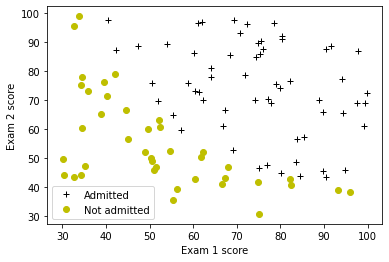

In [13]:
# Visualize data
plotData(initX, y)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

In [14]:
# test sigmoid function
sigmoid(0)

0.5

In [15]:
# initialize features and theta
X, initialTheta, m, n = initFeaturesTheta(initX)

In [16]:
# compute gradient
cost, grad = costFunction(initialTheta, X, y)
# grad = computeGradient(initialTheta, X, y)

print('Cost at initial theta (zeros): {}'.format( cost))
print('Gradient at initial theta (zeros):\n{}'.format( grad))

(100,)
Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]
Accuracy: 89.0
For a test 1 and test 2 score of 45 and 85, respectively, the probability to be accepted is 77.63%


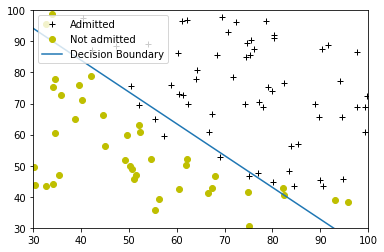

In [18]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initialTheta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

# check decision boundary of current theta
utils.plotDecisionBoundary(plotData, theta, X, y)

# predict results of dataset
accTrain = findAccuracy(X, y, theta)

print("Accuracy: {}".format(accTrain))

# make one predicion
prob = sigmoid( np.array([1, 45, 85]) @ theta)
print("For a test 1 and test 2 score of {} and {}, respectively, \
the probability to be accepted is {:.2f}%".format(45, 85, prob*100))

In [20]:
# load data for regularized logisitic regression
data = np.loadtxt('Data/ex2data2.txt', delimiter=',')
data[:10,:]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ],
       [-0.52477 ,  0.2098  ,  1.      ],
       [-0.39804 ,  0.034357,  1.      ],
       [-0.30588 , -0.19225 ,  1.      ],
       [ 0.016705, -0.40424 ,  1.      ],
       [ 0.13191 , -0.51389 ,  1.      ]])

In [21]:
X = data[:, :2]
y = data[:, 2]

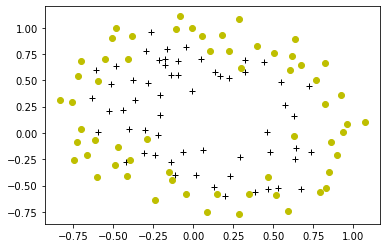

In [22]:
# visualize the data
plotData(X, y)

In [23]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = utils.mapFeature(X[:, 0], X[:, 1])

In [24]:
X.shape

(118, 28)

In [25]:
# regularized logistic regression
initialTheta = np.zeros(X.shape[1])
lambda_ = 1

cost, grad = costFunctionReg(initialTheta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]



C:\Users\jerom\Desktop\python_lab\ml-coursera-python-assignments\Exercise2\utils.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(out)


Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



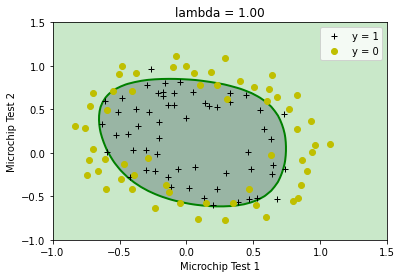

In [26]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
# without regularization, use 0
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

# without regulatization


res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

utils.plotDecisionBoundary(plotData, theta, X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = findAccuracy(X, y, theta)

print('Train Accuracy: %.1f %%' % p)
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

In [27]:
(X @ theta).shape

(118,)

In [28]:
(X @ theta).max()

1.4647552973456268

In [29]:
sigmoid(X@theta)

array([0.69870505, 0.71817649, 0.69977353, 0.72976217, 0.65045262,
       0.62411762, 0.66975093, 0.63410655, 0.63581287, 0.58130001,
       0.53404019, 0.51692601, 0.58122057, 0.48082491, 0.63001946,
       0.71395318, 0.77646893, 0.5605122 , 0.70039077, 0.62427352,
       0.52041492, 0.53189093, 0.49043615, 0.51926709, 0.60454412,
       0.51318411, 0.53457978, 0.39394867, 0.78062589, 0.58962729,
       0.2411283 , 0.58520405, 0.73519566, 0.76690428, 0.74121959,
       0.71610809, 0.65603283, 0.72047554, 0.74695251, 0.65386928,
       0.72894157, 0.69857427, 0.60402047, 0.74505259, 0.64621743,
       0.68058566, 0.42084517, 0.77119401, 0.56066415, 0.61757725,
       0.76640537, 0.81225891, 0.7826851 , 0.79088653, 0.77610471,
       0.69007333, 0.73305131, 0.66471652, 0.23644723, 0.54370278,
       0.69840562, 0.36495369, 0.28437826, 0.47423425, 0.30637503,
       0.10456134, 0.31487852, 0.10051161, 0.13725881, 0.27141968,
       0.19371044, 0.23483607, 0.2073495 , 0.23392038, 0.27251